In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import italy-covid-daywise.csv which contains day-wise Covid-19 data for Italy 

In [2]:
df=pd.read_csv('italy-covid-daywise.csv')
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


retrieve the number of rows and columns in the data frame

In [3]:
print("Number of Rows: ",df.shape[0])
print("Number of Column: ",df.shape[1])

Number of Rows:  248
Number of Column:  4


view statistical information for numerical columns

In [4]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


view some basic information about the data frame like data types, and number of non-nulls

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


create a list of columns within the data frame

In [6]:
df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

return only the days which had more than 1000 reported cases

In [7]:
df.loc[df['new_cases']>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


create positive_rate column that is equal to new_cases / new_tests

In [8]:
df["positive_rate"]=df["new_cases"]/df["new_tests"]
df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


remove the positive_rate column


In [9]:
df=df.drop(columns=["positive_rate"])
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


sort to identify the days with the highest number of cases

In [10]:
df.sort_values("new_cases",ascending=False)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
19,2020-01-19,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN


check the data type of date column, then convert it into a datetime

In [11]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


extract different parts (day, month, weekday, and year) of the date column into separate columns

In [12]:
df['Day']=df['date'].dt.day
df['Week Day']=df['date'].dt.day_name()
df['Month']=df['date'].dt.month_name()
df['Year']=df['date'].dt.year
df

,date,new_cases,new_deaths,new_tests,Day,Week Day,Month,Year
0,2019-12-31,0.0,0.0,NaN,31,Tuesday,December,2019
1,2020-01-01,0.0,0.0,NaN,1,Wednesday,January,2020
2,2020-01-02,0.0,0.0,NaN,2,Thursday,January,2020
3,2020-01-03,0.0,0.0,NaN,3,Friday,January,2020
4,2020-01-04,0.0,0.0,NaN,4,Saturday,January,2020
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,Sunday,August,2020
244,2020-08-31,1365.0,4.0,42583.0,31,Monday,August,2020
245,2020-09-01,996.0,6.0,54395.0,1,Tuesday,September,2020
246,2020-09-02,975.0,8.0,NaN,2,Wednesday,September,2020


check the overall metrics for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')

In [16]:
df.loc[df['Month']=="May"].groupby("Month")[['new_cases', 'new_deaths', 'new_tests']].sum()

,new_cases,new_deaths,new_tests
Month,,,
May,29073.0,5658.0,1078720.0


which day seems like having more cases?

In [32]:
df.sort_values("new_cases",ascending=False).head(1)

,date,new_cases,new_deaths,new_tests,Day,Week Day,Month,Year
82,2020-03-22,6557.0,795.0,NaN,22,Sunday,March,2020


create a new dataframe with month-wise data

In [36]:
month_wise_df=df.groupby("Month",as_index=False,sort=False)[['new_cases', 'new_deaths', 'new_tests']].sum()
month_wise_df

,Month,new_cases,new_deaths,new_tests
0,December,0.0,0.0,0.0
1,January,3.0,0.0,0.0
2,February,885.0,21.0,0.0
3,March,100851.0,11570.0,0.0
4,April,101852.0,16091.0,419591.0
5,May,29073.0,5658.0,1078720.0
6,June,7772.0,1404.0,830354.0
7,July,6722.0,388.0,797692.0
8,August,21060.0,345.0,1098704.0
9,September,3297.0,20.0,54395.0


plot a line graph showing how the number of daily cases varies over time.

<function matplotlib.pyplot.show(close=None, block=None)>

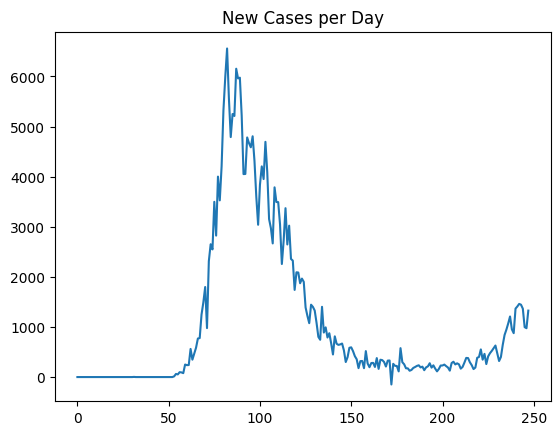

In [42]:
plt.title("New Cases per Day")
plt.plot(df['new_cases'])
plt.show
